log_quasiisodynamic_bin
0-log(0.05)           67469
log(0.1)-log(0.5)     14950
log(0.05)-log(0.1)     8414
log(0.5)-log(1)          22
Name: count, dtype: int64


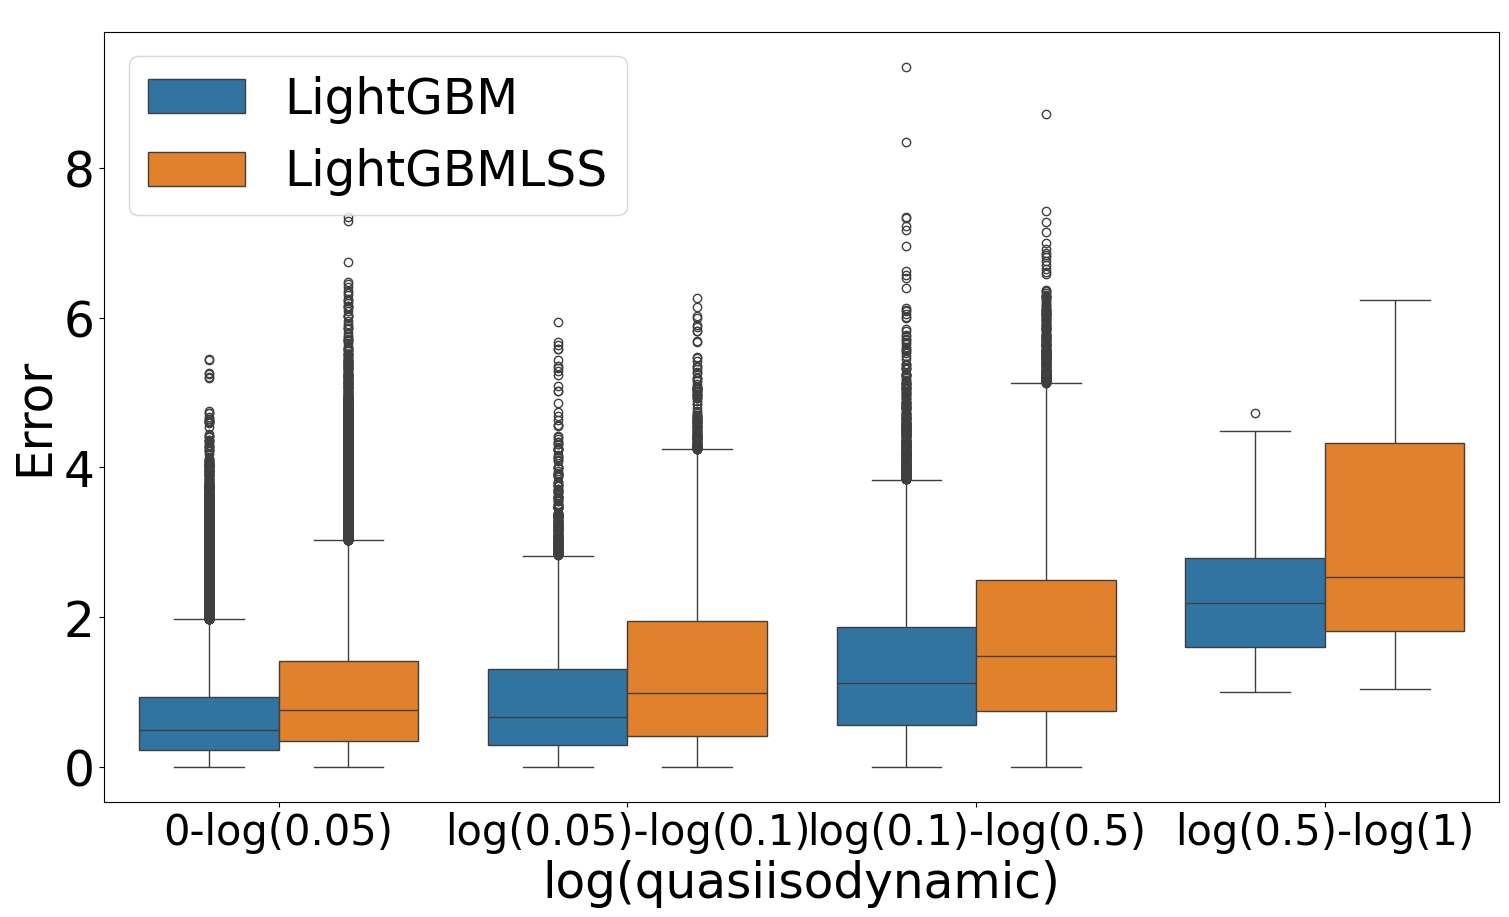

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the errors data
df_lgbm = pd.read_csv('errors_lgbm.csv')
df_lgblss = pd.read_csv('errors_lgblss.csv')
df_lgblss['errors_lgblss'] = df_lgblss['errors_lgblss'].abs()
# Merge the DataFrames
df = pd.merge(df_lgbm, df_lgblss, on='quasiisodynamic')

# Log-transform quasiisodynamic values for bins
log_bins = np.log([0.0001, 0.05, 0.1, 0.5, 1])
log_labels = ['0-log(0.05)', 'log(0.05)-log(0.1)', 'log(0.1)-log(0.5)', 'log(0.5)-log(1)']

# Create bins for log-transformed quasiisodynamic
df['log_quasiisodynamic'] = df['quasiisodynamic']
df['log_quasiisodynamic_bin'] = pd.cut(df['log_quasiisodynamic'], bins=log_bins, labels=log_labels, include_lowest=True)

# Check the bin counts
print(df['log_quasiisodynamic_bin'].value_counts())

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars=['log_quasiisodynamic_bin'], value_vars=['errors_lgbm', 'errors_lgblss'], 
                    var_name='Model', value_name='Error')

# Rename the models for better labels
df_melted['Model'] = df_melted['Model'].replace({'errors_lgbm': 'LightGBM', 'errors_lgblss': 'LightGBMLSS'})

# Plot the boxplot
plt.figure(figsize=(18, 10))
ax = sns.boxplot(x='log_quasiisodynamic_bin', y='Error', hue='Model', data=df_melted)
plt.title(' ')
plt.xlabel('log(quasiisodynamic)', fontsize=35)
plt.ylabel('Error', fontsize=35)
plt.legend(fontsize=35)
plt.xticks(fontsize=30)  # Adjust the font size of the x-tick labels
plt.yticks(fontsize=35)  # Adjust the font size of the x-tick labels
plt.savefig('boxplot_qi.pdf')
plt.show()


In [2]:
df_lgbm.describe()

,quasiisodynamic,errors_lgbm
count,91498.000000,91498.000000
mean,-4.747594,0.812254
std,2.055069,0.765813
min,-12.501607,0.000003
25%,-6.394445,0.262014
50%,-4.918203,0.581903
75%,-2.953748,1.125103
max,-0.567631,9.352661


In [3]:
df_lgblss.describe()

,quasiisodynamic,errors_lgblss
count,91498.000000,563.000000
mean,-4.747594,2.114503
std,2.055069,1.505199
min,-12.501607,0.003660
25%,-6.394445,0.813224
50%,-4.918203,1.882168
75%,-2.953748,3.225783
max,-0.567631,7.111067
